<a href="https://colab.research.google.com/github/sidharrth2002/stanford-cars/blob/main/ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Transformers on Stanford Cars

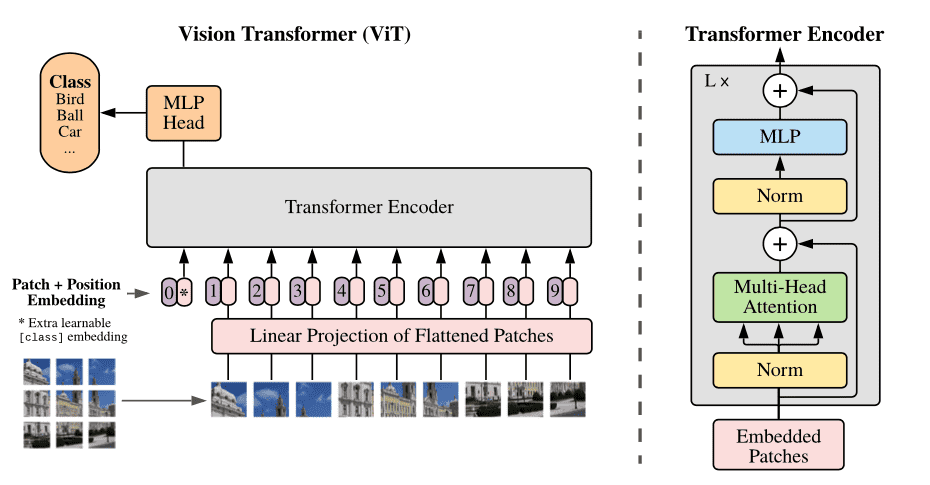

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')
print('TensorFlow Version ' + tf.__version__)

TensorFlow Version 2.8.0


In [3]:
!cp -r '/content/drive/Shareddrives/ML/MLP/train.zip' .
!cp -r '/content/drive/Shareddrives/ML/MLP/val.zip' .
!cp -r '/content/drive/Shareddrives/ML/MLP/test.zip' .
!unzip train.zip
!unzip val.zip
!unzip test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/Audi S4 Sedan 2007/01772.jpg  
  inflating: test/Audi S4 Sedan 2007/07660.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05574.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05670.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/06535.jpg  
  inflating: test/Audi S4 Sedan 2007/02743.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05098.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05814.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/04907.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05078.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/02176.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/02831.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/03905.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/04396.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/04751.jpg  
  inflating: test/Audi S4 Sedan 2007/03217.jpg  
  inflating: test/Vol

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 7

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'train'
val_path = 'val'
test_path = 'test'

BATCH_SIZE = 64
train_gen = ImageDataGenerator(rescale=1./255,
        # shear_range=0.2,
        # rotation_range=20.,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=[0.9, 1.25],
        # brightness_range=[0.5, 1.5],
        horizontal_flip=True).flow_from_directory(train_path, 
                                                  target_size=(224, 224), 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  class_mode='categorical', 
                                                  shuffle=True, 
                                                  seed=1)
val_gen = ImageDataGenerator(rescale=1./255,
        # shear_range=0.2,
        # rotation_range=20.,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=[0.9, 1.25],
        # brightness_range=[0.5, 1.5],
        horizontal_flip=True).flow_from_directory(val_path, 
                                                  target_size=(224, 224), 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  class_mode='categorical', 
                                                  shuffle=True, 
                                                  seed=1)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path, 
                                                        target_size=(224, 224), 
                                                        color_mode="rgb", 
                                                        batch_size=BATCH_SIZE, 
                                                        class_mode='categorical',
                                                        shuffle=True, 
                                                        seed=1)

Found 12997 images belonging to 196 classes.
Found 1629 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [ ]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
#                                                           samplewise_center = True,
#                                                           samplewise_std_normalization = True,
# #                                                           validation_split = 0.2,
#                                                           preprocessing_function = data_augment)

In [ ]:
# train_gen = datagen.flow_from_directory('./car_data/car_data/train', target_size=(224, 224), color_mode="rgb", batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True, seed=1)

In [ ]:
# valid_gen = datagen.flow_from_directory('./car_data/car_data/test', target_size=(224, 224), color_mode="rgb", batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False, seed=1)

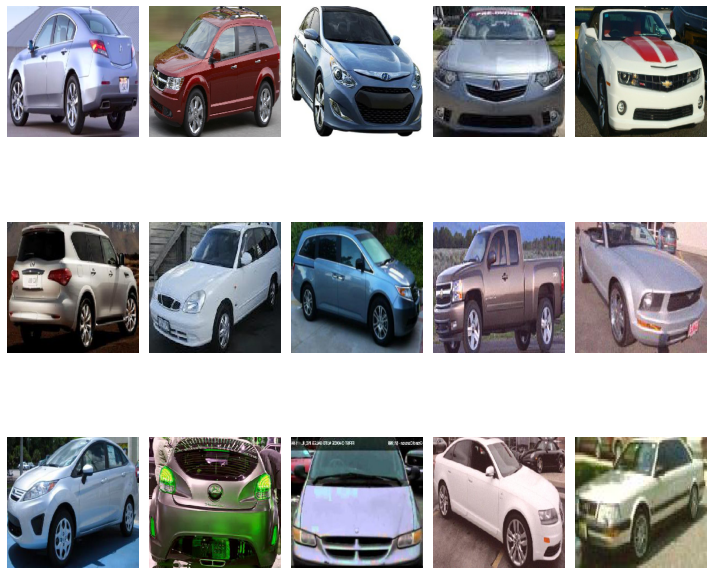

In [ ]:
images = [train_gen[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(IMAGE_SIZE, IMAGE_SIZE, 3))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
!pip install --quiet vit-keras
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.9 MB/s 


In [ ]:
from vit_keras import vit

vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 196)

In [ ]:
x = train_gen.next()
x[0][1].shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/Shareddrives/ML/ViT')
vit_model = model.layers[0]

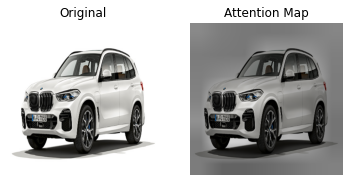

In [20]:
from vit_keras import vit, utils, visualize
import numpy as np

# x = train_gen.next()
# image = np.array(x[0][2])

image_size=384
url = '/content/bmw.jpg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

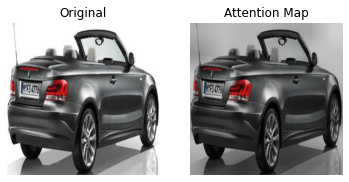

In [22]:
image_size=384
url = '/content/train/BMW 1 Series Convertible 2012/00798.jpg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

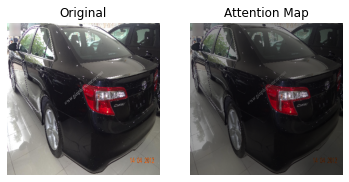

In [23]:
image_size=384
url = '/content/train/Toyota Camry Sedan 2012/00259.jpg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

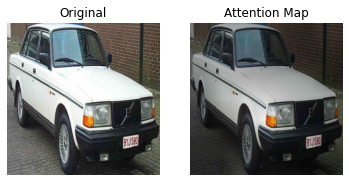

In [24]:
image_size=384
url = '/content/train/Volvo 240 Sedan 1993/00030.jpg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

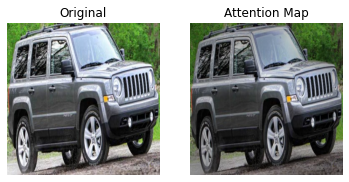

In [25]:
image_size=384
url = '/content/train/Jeep Patriot SUV 2012/00344.jpg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

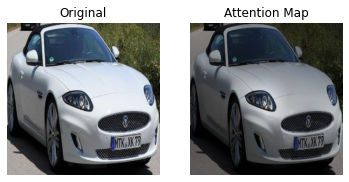

In [26]:
image_size=384
url = '/content/train/Jaguar XK XKR 2012/01989.jpg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

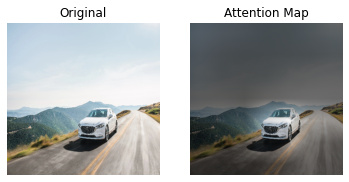

In [27]:
image_size=384
url = '/content/mazda.webp'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

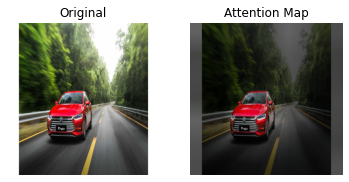

In [28]:
image_size=384
url = '/content/byd-qin-pro-dm-phev.jpeg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

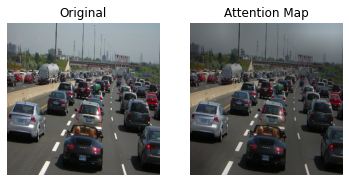

In [29]:
image_size=384
url = '/content/many_cars.jpeg'
image = utils.read(url, image_size)

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(196, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 196)               150724    
                                                                 
Total params: 87,609,028
Trainable params: 87,607,492
Non-trainable params: 1,536
_________________________________________________________________


In [ ]:
import tensorflow_addons as tfa
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy

learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = [CategoricalAccuracy(), TopKCategoricalAccuracy(k=3)])

In [ ]:
STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = val_gen.n // val_gen.batch_size

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_categorical_accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_categorical_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/drive/Shareddrives/ML/ViT',
                                                  monitor = 'val_categorical_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

EPOCHS = 10

model.fit(x = train_gen,
    steps_per_epoch = STEP_SIZE_TRAIN,
    validation_data = val_gen,
    validation_steps = STEP_SIZE_VALID,
    epochs = EPOCHS,
    callbacks = callbacks
)

Epoch 1/10
203/203 [==============================] - ETA: 0s - loss: 3.5021 - categorical_accuracy: 0.2372 - top_k_categorical_accuracy: 0.4001
Epoch 1: val_categorical_accuracy improved from -inf to 0.37312, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 326s 2s/step - loss: 3.5021 - categorical_accuracy: 0.2372 - top_k_categorical_accuracy: 0.4001 - val_loss: 2.6764 - val_categorical_accuracy: 0.3731 - val_top_k_categorical_accuracy: 0.5987 - lr: 1.0000e-04
Epoch 2/10
203/203 [==============================] - ETA: 0s - loss: 2.0269 - categorical_accuracy: 0.5607 - top_k_categorical_accuracy: 0.7665
Epoch 2: val_categorical_accuracy improved from 0.37312 to 0.59688, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 325s 2s/step - loss: 2.0269 - categorical_accuracy: 0.5607 - top_k_categorical_accuracy: 0.7665 - val_loss: 1.6813 - val_categorical_accuracy: 0.5969 - val_top_k_categorical_accuracy: 0.7844 - lr: 1.0000e-04
Epoch 3/10
203/203 [==============================] - ETA: 0s - loss: 1.0507 - categorical_accuracy: 0.8086 - top_k_categorical_accuracy: 0.9335
Epoch 3: val_categorical_accuracy improved from 0.59688 to 0.69187, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 324s 2s/step - loss: 1.0507 - categorical_accuracy: 0.8086 - top_k_categorical_accuracy: 0.9335 - val_loss: 1.1918 - val_categorical_accuracy: 0.6919 - val_top_k_categorical_accuracy: 0.8619 - lr: 1.0000e-04
Epoch 4/10
203/203 [==============================] - ETA: 0s - loss: 0.5501 - categorical_accuracy: 0.9197 - top_k_categorical_accuracy: 0.9823
Epoch 4: val_categorical_accuracy improved from 0.69187 to 0.75250, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 324s 2s/step - loss: 0.5501 - categorical_accuracy: 0.9197 - top_k_categorical_accuracy: 0.9823 - val_loss: 0.9656 - val_categorical_accuracy: 0.7525 - val_top_k_categorical_accuracy: 0.8969 - lr: 1.0000e-04
Epoch 5/10
203/203 [==============================] - ETA: 0s - loss: 0.2936 - categorical_accuracy: 0.9666 - top_k_categorical_accuracy: 0.9962
Epoch 5: val_categorical_accuracy improved from 0.75250 to 0.78000, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 326s 2s/step - loss: 0.2936 - categorical_accuracy: 0.9666 - top_k_categorical_accuracy: 0.9962 - val_loss: 0.8473 - val_categorical_accuracy: 0.7800 - val_top_k_categorical_accuracy: 0.9169 - lr: 1.0000e-04
Epoch 6/10
203/203 [==============================] - ETA: 0s - loss: 0.1569 - categorical_accuracy: 0.9870 - top_k_categorical_accuracy: 0.9992
Epoch 6: val_categorical_accuracy improved from 0.78000 to 0.79937, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 326s 2s/step - loss: 0.1569 - categorical_accuracy: 0.9870 - top_k_categorical_accuracy: 0.9992 - val_loss: 0.7564 - val_categorical_accuracy: 0.7994 - val_top_k_categorical_accuracy: 0.9269 - lr: 1.0000e-04
Epoch 7/10
203/203 [==============================] - ETA: 0s - loss: 0.1023 - categorical_accuracy: 0.9938 - top_k_categorical_accuracy: 0.9999
Epoch 7: val_categorical_accuracy improved from 0.79937 to 0.80375, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 325s 2s/step - loss: 0.1023 - categorical_accuracy: 0.9938 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.7505 - val_categorical_accuracy: 0.8037 - val_top_k_categorical_accuracy: 0.9275 - lr: 1.0000e-04
Epoch 8/10
203/203 [==============================] - ETA: 0s - loss: 0.0627 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 1.0000
Epoch 8: val_categorical_accuracy improved from 0.80375 to 0.80437, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 325s 2s/step - loss: 0.0627 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7391 - val_categorical_accuracy: 0.8044 - val_top_k_categorical_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 9/10
203/203 [==============================] - ETA: 0s - loss: 0.0446 - categorical_accuracy: 0.9974 - top_k_categorical_accuracy: 1.0000
Epoch 9: val_categorical_accuracy improved from 0.80437 to 0.81625, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 326s 2s/step - loss: 0.0446 - categorical_accuracy: 0.9974 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7184 - val_categorical_accuracy: 0.8163 - val_top_k_categorical_accuracy: 0.9300 - lr: 1.0000e-04
Epoch 10/10
203/203 [==============================] - ETA: 0s - loss: 0.0364 - categorical_accuracy: 0.9980 - top_k_categorical_accuracy: 0.9999
Epoch 10: val_categorical_accuracy did not improve from 0.81625
203/203 [==============================] - 268s 1s/step - loss: 0.0364 - categorical_accuracy: 0.9980 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.7343 - val_categorical_accuracy: 0.8087 - val_top_k_categorical_accuracy: 0.9200 - lr: 1.0000e-04


In [ ]:
# evaluate on test set
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy

# model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[CategoricalAccuracy(), TopKCategoricalAccuracy(k=3)])
model.evaluate(test_gen)

126/126 [==============================] - 62s 487ms/step - loss: 0.7575 - categorical_accuracy: 0.8018 - top_k_categorical_accuracy: 0.9254


[0.7574513554573059, 0.8017659783363342, 0.9253824353218079]

In [ ]:
from tensorflow.keras.models import load_model
EPOCHS = 7

model = load_model('/content/drive/Shareddrives/ML/ViT')

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = val_gen.n // val_gen.batch_size

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_categorical_accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_categorical_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/drive/Shareddrives/ML/ViT',
                                                  monitor = 'val_categorical_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

history = model.fit(x = train_gen,
    steps_per_epoch = STEP_SIZE_TRAIN,
    validation_data = val_gen,
    validation_steps = STEP_SIZE_VALID,
    epochs = EPOCHS,
    callbacks = callbacks
)

Epoch 1/7
203/203 [==============================] - ETA: 0s - loss: 0.0340 - categorical_accuracy: 0.9978 - top_k_categorical_accuracy: 1.0000
Epoch 1: val_categorical_accuracy improved from -inf to 0.81563, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 378s 2s/step - loss: 0.0340 - categorical_accuracy: 0.9978 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7247 - val_categorical_accuracy: 0.8156 - val_top_k_categorical_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 2/7
203/203 [==============================] - ETA: 0s - loss: 0.0408 - categorical_accuracy: 0.9954 - top_k_categorical_accuracy: 0.9998
Epoch 2: val_categorical_accuracy did not improve from 0.81563
203/203 [==============================] - 281s 1s/step - loss: 0.0408 - categorical_accuracy: 0.9954 - top_k_categorical_accuracy: 0.9998 - val_loss: 0.7561 - val_categorical_accuracy: 0.8000 - val_top_k_categorical_accuracy: 0.9219 - lr: 1.0000e-04
Epoch 3/7
203/203 [==============================] - ETA: 0s - loss: 0.0328 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 0.9999
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 3: val_categorical_accuracy did not improve from 0.81563
203/20

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 338s 2s/step - loss: 0.0177 - categorical_accuracy: 0.9985 - top_k_categorical_accuracy: 0.9998 - val_loss: 0.6983 - val_categorical_accuracy: 0.8288 - val_top_k_categorical_accuracy: 0.9350 - lr: 2.0000e-05
Epoch 5/7
203/203 [==============================] - ETA: 0s - loss: 0.0115 - categorical_accuracy: 0.9989 - top_k_categorical_accuracy: 1.0000
Epoch 5: val_categorical_accuracy improved from 0.82875 to 0.83312, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 338s 2s/step - loss: 0.0115 - categorical_accuracy: 0.9989 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6847 - val_categorical_accuracy: 0.8331 - val_top_k_categorical_accuracy: 0.9325 - lr: 2.0000e-05
Epoch 6/7
203/203 [==============================] - ETA: 0s - loss: 0.0104 - categorical_accuracy: 0.9988 - top_k_categorical_accuracy: 1.0000
Epoch 6: val_categorical_accuracy improved from 0.83312 to 0.83812, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 337s 2s/step - loss: 0.0104 - categorical_accuracy: 0.9988 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6829 - val_categorical_accuracy: 0.8381 - val_top_k_categorical_accuracy: 0.9350 - lr: 2.0000e-05
Epoch 7/7
203/203 [==============================] - ETA: 0s - loss: 0.0089 - categorical_accuracy: 0.9990 - top_k_categorical_accuracy: 1.0000
Epoch 7: val_categorical_accuracy improved from 0.83812 to 0.84062, saving model to /content/drive/Shareddrives/ML/ViT


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 338s 2s/step - loss: 0.0089 - categorical_accuracy: 0.9990 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6483 - val_categorical_accuracy: 0.8406 - val_top_k_categorical_accuracy: 0.9344 - lr: 2.0000e-05


In [ ]:
EPOCHS = 3

model.fit(x = train_gen,
    steps_per_epoch = STEP_SIZE_TRAIN,
    validation_data = val_gen,
    validation_steps = STEP_SIZE_VALID,
    epochs = EPOCHS,
    callbacks = callbacks
)

Epoch 1/3
203/203 [==============================] - ETA: 0s - loss: 0.0096 - categorical_accuracy: 0.9987 - top_k_categorical_accuracy: 1.0000
Epoch 1: val_categorical_accuracy did not improve from 0.84062
203/203 [==============================] - 281s 1s/step - loss: 0.0096 - categorical_accuracy: 0.9987 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6784 - val_categorical_accuracy: 0.8388 - val_top_k_categorical_accuracy: 0.9325 - lr: 2.0000e-05
Epoch 2/3
203/203 [==============================] - ETA: 0s - loss: 0.0101 - categorical_accuracy: 0.9986 - top_k_categorical_accuracy: 1.0000
Epoch 2: val_categorical_accuracy did not improve from 0.84062
203/203 [==============================] - 280s 1s/step - loss: 0.0101 - categorical_accuracy: 0.9986 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6940 - val_categorical_accuracy: 0.8275 - val_top_k_categorical_accuracy: 0.9350 - lr: 2.0000e-05
Epoch 3/3
203/203 [==============================] - ETA: 0s - loss: 0.0072 - catego

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets


203/203 [==============================] - 335s 2s/step - loss: 0.0072 - categorical_accuracy: 0.9991 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6687 - val_categorical_accuracy: 0.8413 - val_top_k_categorical_accuracy: 0.9413 - lr: 2.0000e-05


In [ ]:
# evaluate on test set
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy

# model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[CategoricalAccuracy(), TopKCategoricalAccuracy(k=3)])
model.evaluate(test_gen)

126/126 [==============================] - 58s 457ms/step - loss: 0.7061 - categorical_accuracy: 0.8261 - top_k_categorical_accuracy: 0.9332


[0.7060655355453491, 0.8261409997940063, 0.9332172870635986]

In [ ]:
# best is 0.8317

In [32]:
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy, Precision, Recall
import tensorflow_addons as tfa

learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[CategoricalAccuracy(), TopKCategoricalAccuracy(k=3), Precision(), Recall()])
model.evaluate(test_gen)

126/126 [==============================] - 65s 476ms/step - loss: 0.7061 - categorical_accuracy: 0.8261 - top_k_categorical_accuracy: 0.9332 - precision_1: 0.8834 - recall: 0.7885


[0.7060655355453491,
 0.8261409997940063,
 0.9332172870635986,
 0.8833774328231812,
 0.7884591221809387]

In [33]:
import numpy as np

predictions = model.predict(test_gen)
pred = np.argmax(predictions, axis=1)
errors = pred == test_gen.classes

ValueError: ignored

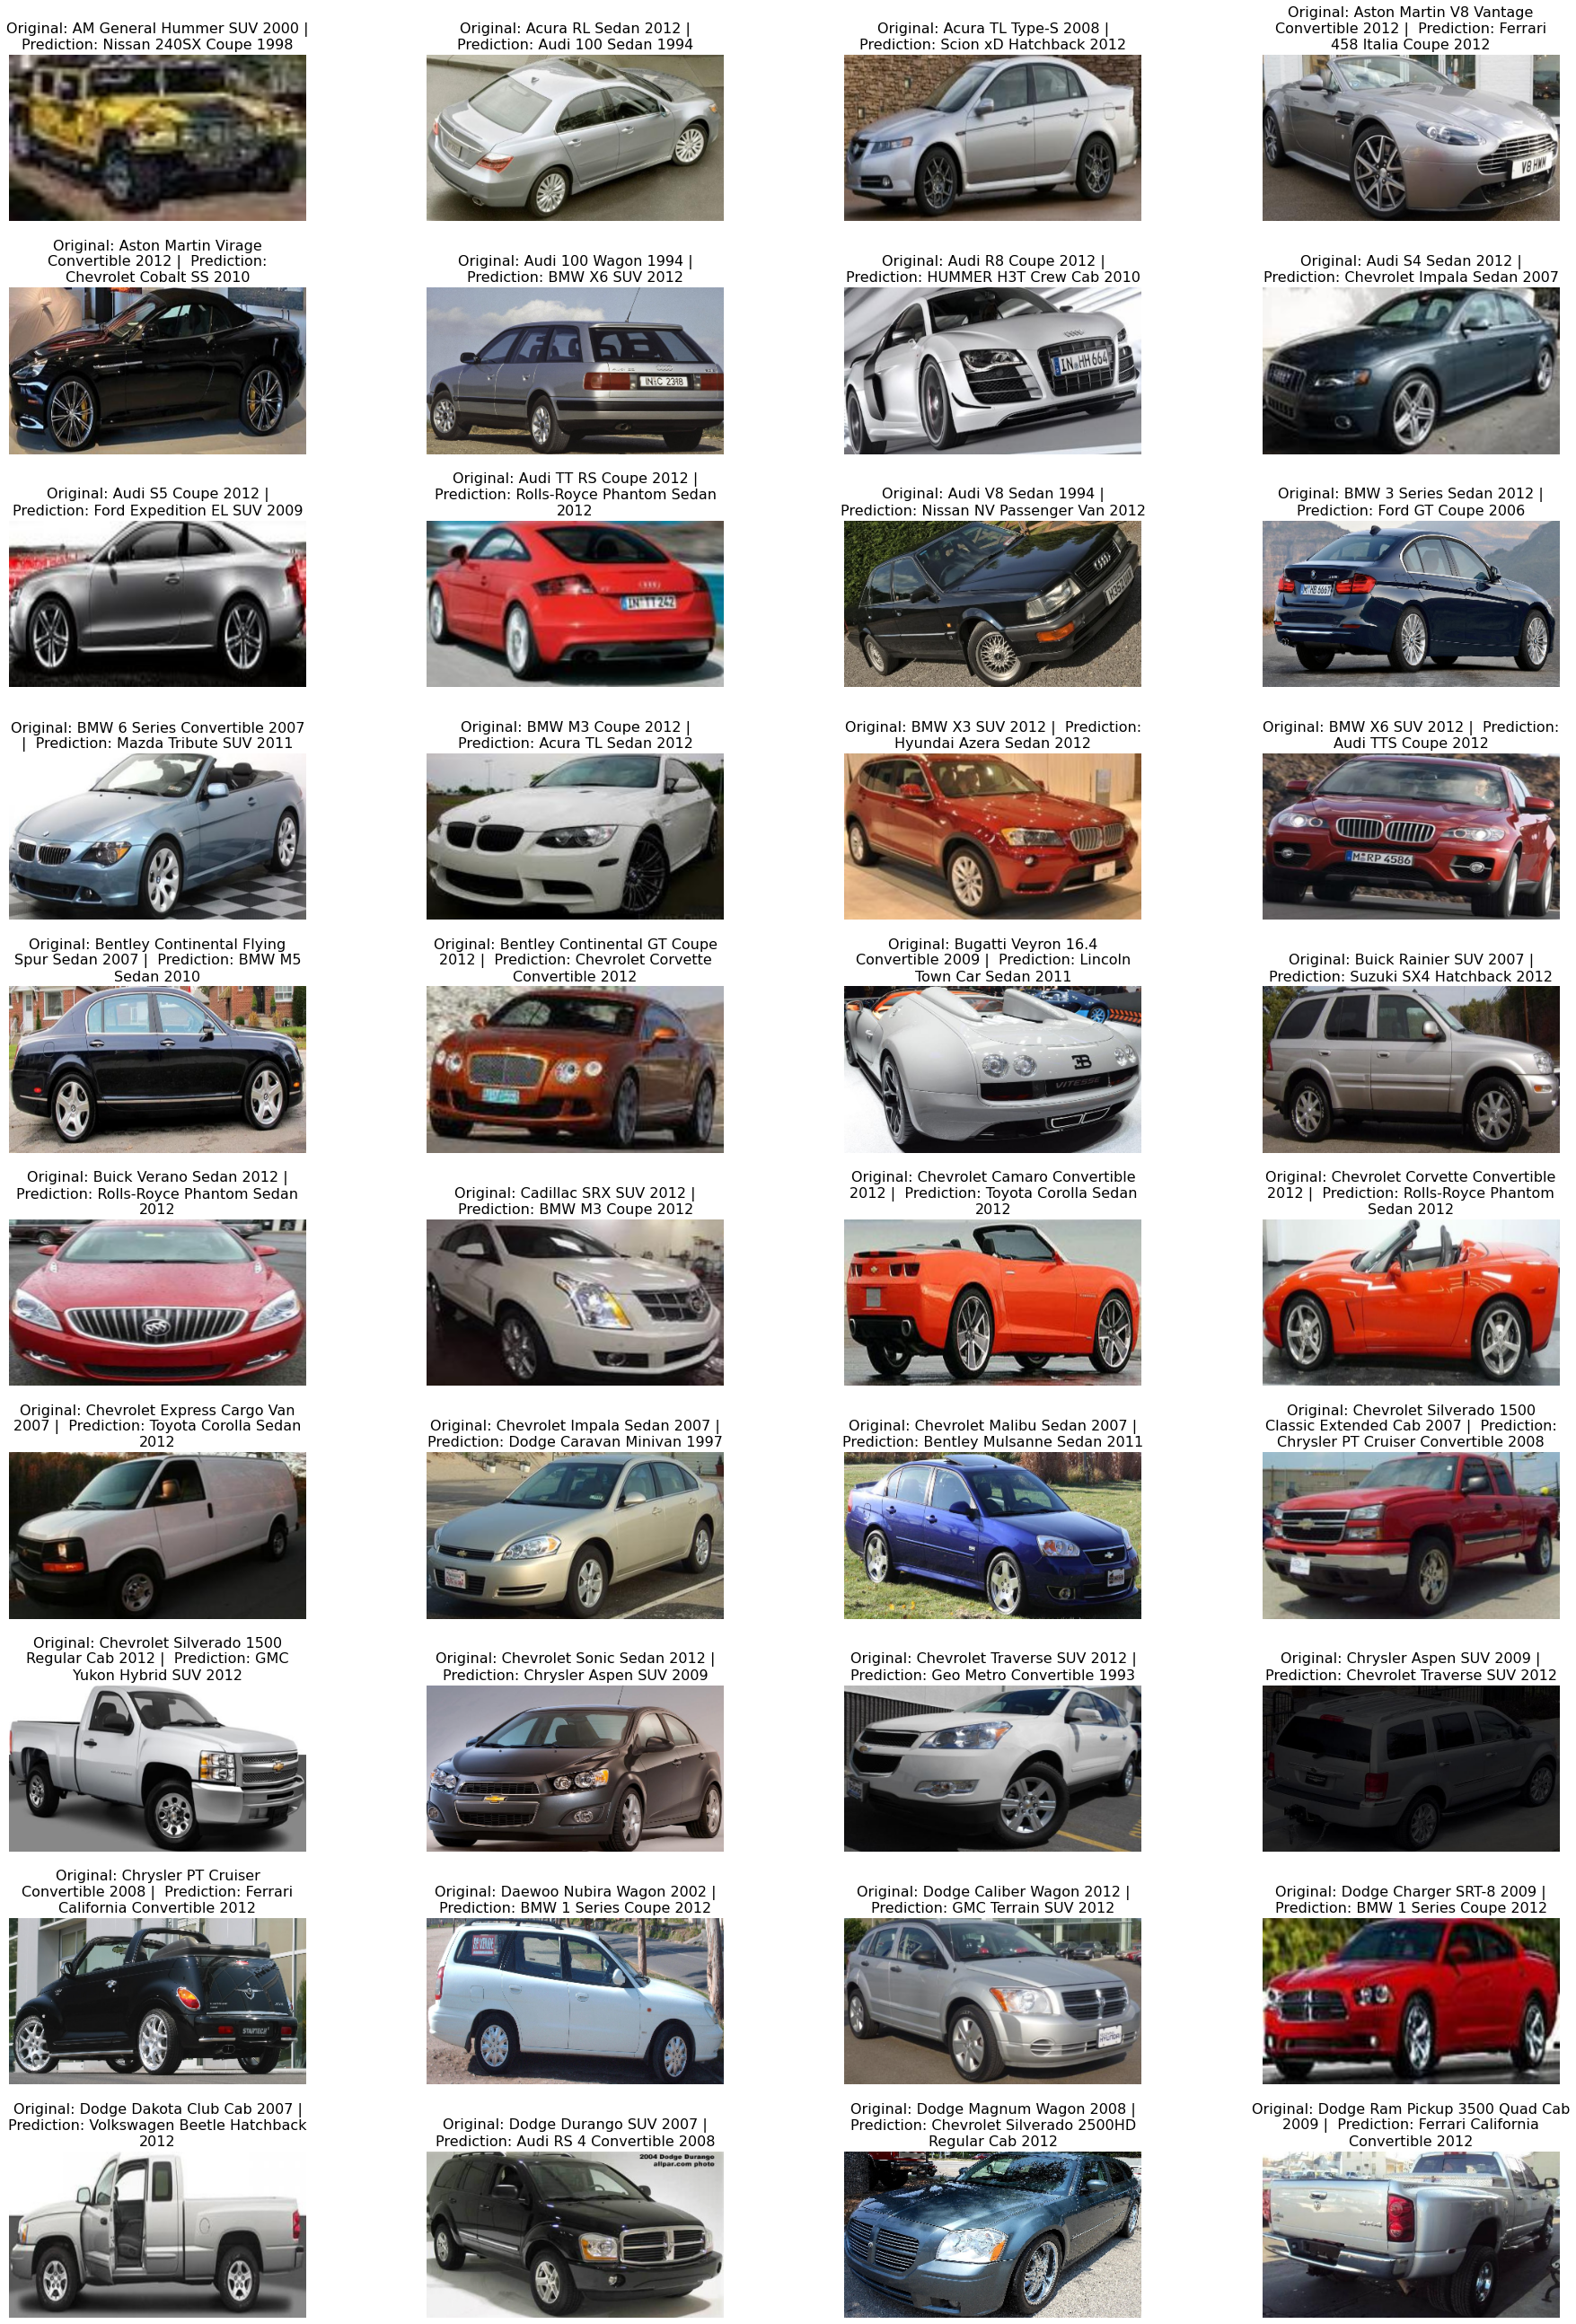

In [35]:
from PIL import Image
from os.path import join
import IPython.display as display
import cv2
from textwrap import wrap

# create figure
fig = plt.figure(figsize=(30, 50))
plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
# fig.tight_layout()
# setting values to rows and column variables
rows = 10
columns = 4

label_mapping = {y: x for x, y in test_gen.class_indices.items()}
counter = 0
even_counter = 100
for i in range(len(errors)):
  if errors[i] == False and even_counter % 100 == 0:
    im = cv2.imread(join('test', test_gen.filenames[i]))
    im = cv2.resize(im, (400, 224))
    
    fig.add_subplot(rows, columns, counter + 1).set_title("\n".join(wrap(f'Original: {label_mapping[test_gen.classes[i]]} | \n' + f'Prediction: {label_mapping[pred[i]]}', width=40)), fontdict={'fontsize':16})
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    # plt.title(f'Original: {label_mapping[test_datagen.classes[i]]} | \n' + f'Prediction: {label_mapping[pred[i]]}', fontdict={'fontsize':14}, wrap=True)
    plt.axis('off')
    # print(f'Original: {label_mapping[test_datagen.classes[i]]}')
    # print(f'Prediction: {label_mapping[pred[i]]}')
    counter += 1
    if counter == 1000:
      break
  even_counter += 1


## Transfer Learning then Fine-tuning

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 5.4 MB/s 


In [ ]:
import kerastuner as kt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
from vit_keras import vit
from tensorflow.keras import layers, Sequential, optimizers, losses
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy, Recall, Precision
import tensorflow_addons as tfa

def build_model(hp):
  IMAGE_SIZE = 224
  vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 196)
  model = Sequential()
  model.add(vit_model)
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  for i in range(1, hp.Int("num_layers", 1, 2)):
    model.add(layers.Dense(units=hp.Int("units_" + str(i), min_value=256, max_value=512, step=256), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(196, activation='softmax'))

  hp_learning_rate = hp.Choice("learning_rate", values=[1e-3, 1e-4])
  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=hp_learning_rate), loss=losses.CategoricalCrossentropy(), metrics=[CategoricalAccuracy(), TopKCategoricalAccuracy(k=3), Recall(), Precision()])

  return model

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective="val_categorical_accuracy",
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations=5,
                     directory='/content/drive/Shareddrives/ML/ViT_hyperparam_search_3',
                     project_name="kt_hyperband",)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

NUM_EPOCHS = 20

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = val_gen.n // val_gen.batch_size

# model.fit(x = train_gen,
#     steps_per_epoch = STEP_SIZE_TRAIN,
#     validation_data = val_gen,
#     validation_steps = STEP_SIZE_VALID,
#     epochs = EPOCHS,
#     callbacks = callbacks
# )

tuner.search(x=train_gen, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_gen, validation_steps=STEP_SIZE_VALID, epochs=NUM_EPOCHS, callbacks=[stop_early])

Trial 5 Complete [00h 06m 40s]
val_categorical_accuracy: 0.44437500834465027

Best val_categorical_accuracy So Far: 0.4768750071525574
Total elapsed time: 00h 34m 10s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_layers
0.001             |0.01              |learning_rate
288               |None              |units_1
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
164/203 [=======================>......] - ETA: 19s - loss: 3.9008 - categorical_accuracy: 0.1596 - top_k_categorical_accuracy: 0.2987 - recall: 0.0236 - precision: 0.6685

KeyboardInterrupt: ignored

In [ ]:
tuner.search(x=train_gen, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_gen, validation_steps=STEP_SIZE_VALID, epochs=NUM_EPOCHS, callbacks=[stop_early, tf.keras.callbacks.TensorBoard('/content/drive/Shareddrives/ML/ViT_hyperparam_logs')])

Trial 8 Complete [00h 06m 23s]
val_categorical_accuracy: 0.4793750047683716

Best val_categorical_accuracy So Far: 0.4793750047683716
Total elapsed time: 00h 41m 48s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
1                 |2                 |num_layers
0.001             |0.001             |learning_rate
256               |256               |units_1
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
203/203 [==============================] - ETA: 0s - loss: 3.7093 - categorical_accuracy: 0.1887 - top_k_categorical_accuracy: 0.3395 - recall: 0.0340 - precision: 0.7178

KeyboardInterrupt: ignored

In [ ]:
tuner.search(x=train_gen, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=val_gen, validation_steps=STEP_SIZE_VALID, epochs=NUM_EPOCHS, callbacks=[stop_early, tf.keras.callbacks.TensorBoard('/content/drive/Shareddrives/ML/ViT_hyperparam_logs_2')])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
2                 |?                 |num_layers
0.0001            |?                 |learning_rate
3                 |?                 |tuner/epochs
0                 |?                 |tuner/initial_epoch
2                 |?                 |tuner/bracket
0                 |?                 |tuner/round

Epoch 1/3
 13/203 [>.............................] - ETA: 4:05 - loss: 5.7966 - categorical_accuracy: 0.0024 - top_k_categorical_accuracy: 0.0168 - recall: 0.0000e+00 - precision: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
!pip install keras-lr-finder

In [ ]:
from keras_lr_finder import LRFinder

In [ ]:
from matplotlib import pyplot as plt
import math
from keras.callbacks import LambdaCallback
import keras.backend as K
import numpy as np


class LRFinder2:
    """
    Plots the change of the loss function of a Keras model when the learning rate is exponentially increasing.
    See for details:
    https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
    """

    def __init__(self, model):
        self.model = model
        self.losses = []
        self.lrs = []
        self.best_loss = 1e9

    def on_batch_end(self, batch, logs):
        # Log the learning rate
        lr = K.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)

        # Log the loss
        loss = logs['loss']
        self.losses.append(loss)

        # Check whether the loss got too large or NaN
        if batch > 5 and (math.isnan(loss) or loss > self.best_loss * 4):
            self.model.stop_training = True
            return

        if loss < self.best_loss:
            self.best_loss = loss

        # Increase the learning rate for the next batch
        lr *= self.lr_mult
        K.set_value(self.model.optimizer.lr, lr)

    def find(self, x_train, y_train, start_lr, end_lr, batch_size=64, epochs=1, **kw_fit):
        # If x_train contains data for multiple inputs, use length of the first input.
        # Assumption: the first element in the list is single input; NOT a list of inputs.
        N = x_train[0].shape[0] if isinstance(x_train, list) else x_train.shape[0]

        # Compute number of batches and LR multiplier
        num_batches = epochs * N / batch_size
        self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(num_batches))
        # Save weights into a file
        initial_weights = self.model.get_weights()

        # Remember the original learning rate
        original_lr = K.get_value(self.model.optimizer.lr)

        # Set the initial learning rate
        K.set_value(self.model.optimizer.lr, start_lr)

        callback = LambdaCallback(on_batch_end=lambda batch, logs: self.on_batch_end(batch, logs))

        self.model.fit(x_train, y_train,
                       batch_size=batch_size, epochs=epochs,
                       callbacks=[callback],
                       **kw_fit)

        # Restore the weights to the state before model fitting
        self.model.set_weights(initial_weights)

        # Restore the original learning rate
        K.set_value(self.model.optimizer.lr, original_lr)

    def find_generator(self, generator, start_lr, end_lr, epochs=1, steps_per_epoch=None, **kw_fit):
        if steps_per_epoch is None:
            try:
                steps_per_epoch = len(generator)
            except (ValueError, NotImplementedError) as e:
                raise e('`steps_per_epoch=None` is only valid for a'
                        ' generator based on the '
                        '`keras.utils.Sequence`'
                        ' class. Please specify `steps_per_epoch` '
                        'or use the `keras.utils.Sequence` class.')
        self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(epochs * steps_per_epoch))

        # Save weights into a file
        initial_weights = self.model.get_weights()

        # Remember the original learning rate
        original_lr = K.get_value(self.model.optimizer.lr)

        # Set the initial learning rate
        K.set_value(self.model.optimizer.lr, start_lr)

        callback = LambdaCallback(on_batch_end=lambda batch,
                                                      logs: self.on_batch_end(batch, logs))

        self.model.fit_generator(generator=generator,
                                 epochs=epochs,
                                 steps_per_epoch=steps_per_epoch,
                                 callbacks=[callback],
                                 **kw_fit)

        # Restore the weights to the state before model fitting
        self.model.set_weights(initial_weights)

        # Restore the original learning rate
        K.set_value(self.model.optimizer.lr, original_lr)

    def plot_loss(self, n_skip_beginning=10, n_skip_end=5, x_scale='log'):
        """
        Plots the loss.
        Parameters:
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
        """
        plt.ylabel("loss")
        plt.xlabel("learning rate (log scale)")
        plt.plot(self.lrs[n_skip_beginning:-n_skip_end], self.losses[n_skip_beginning:-n_skip_end])
        plt.xscale(x_scale)
        plt.show()

    def plot_loss_change(self, sma=1, n_skip_beginning=10, n_skip_end=5, y_lim=(-0.01, 0.01)):
        """
        Plots rate of change of the loss function.
        Parameters:
            sma - number of batches for simple moving average to smooth out the curve.
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
            y_lim - limits for the y axis.
        """
        derivatives = self.get_derivatives(sma)[n_skip_beginning:-n_skip_end]
        lrs = self.lrs[n_skip_beginning:-n_skip_end]
        plt.ylabel("rate of loss change")
        plt.xlabel("learning rate (log scale)")
        plt.plot(lrs, derivatives)
        plt.xscale('log')
        plt.ylim(y_lim)
        plt.show()

    def get_derivatives(self, sma):
        assert sma >= 1
        derivatives = [0] * sma
        for i in range(sma, len(self.lrs)):
            derivatives.append((self.losses[i] - self.losses[i - sma]) / sma)
        return derivatives

    def get_best_lr(self, sma, n_skip_beginning=10, n_skip_end=5):
        derivatives = self.get_derivatives(sma)
        best_der_idx = np.argmin(derivatives[n_skip_beginning:-n_skip_end])
        return self.lrs[n_skip_beginning:-n_skip_end][best_der_idx]

In [ ]:
import tensorflow_addons as tfa
from tensorflow.keras import layers, Sequential, optimizers, losses
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy, Recall, Precision

model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(196, 'softmax')
    ],
    name = 'vision_transformer')

learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(lr = learning_rate)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = [CategoricalAccuracy(), TopKCategoricalAccuracy(k=3)])

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size

lr_finder = LRFinder2(model)
lr_finder.find_generator(train_gen, start_lr=1e-8, end_lr=1e-2, epochs=5, steps_per_epoch=STEP_SIZE_TRAIN)

Epoch 1/5
203/203 [==============================] - 302s 1s/step - loss: 6.1068 - categorical_accuracy: 0.0049 - top_k_categorical_accuracy: 0.0159
Epoch 2/5
203/203 [==============================] - 262s 1s/step - loss: 6.0837 - categorical_accuracy: 0.0058 - top_k_categorical_accuracy: 0.0187
Epoch 3/5
203/203 [==============================] - 261s 1s/step - loss: 5.8743 - categorical_accuracy: 0.0092 - top_k_categorical_accuracy: 0.0228
Epoch 4/5
203/203 [==============================] - 261s 1s/step - loss: 4.0021 - categorical_accuracy: 0.1666 - top_k_categorical_accuracy: 0.2909
Epoch 5/5
203/203 [==============================] - 262s 1s/step - loss: 3.7729 - categorical_accuracy: 0.2830 - top_k_categorical_accuracy: 0.3975


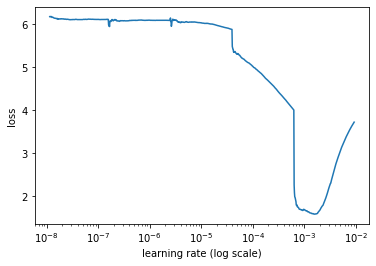

In [ ]:
lr_finder.plot_loss()

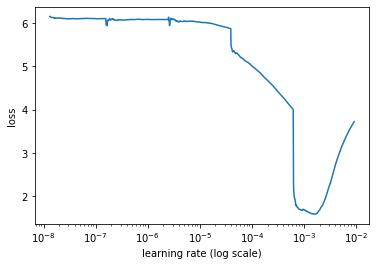

In [ ]:
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

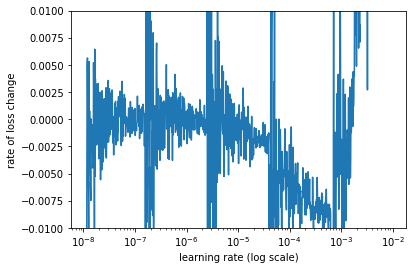

In [ ]:
lr_finder.plot_loss_change()

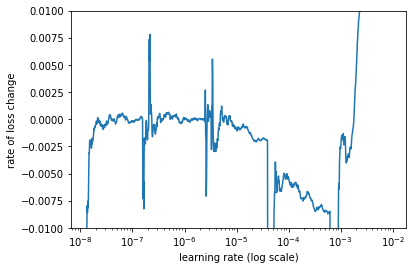

In [ ]:
lr_finder.plot_loss_change(sma=20, n_skip_beginning=20, n_skip_end=5, y_lim=(-0.01, 0.01))

In [ ]:
lr_finder.get_derivatives(sma=1)

[0,
 -0.12233877182006836,
 -0.04563140869140625,
 0.006098747253417969,
 -0.028101444244384766,
 0.012270450592041016,
 -0.01926898956298828,
 -0.04870414733886719,
 -0.03697061538696289,
 -0.00016689300537109375,
 -0.025007247924804688,
 -0.005588054656982422,
 0.0049495697021484375,
 0.00563812255859375,
 0.0007963180541992188,
 -0.005993366241455078,
 -0.005789756774902344,
 -0.011476993560791016,
 0.005314826965332031,
 -0.0018467903137207031,
 0.0007576942443847656,
 -0.002613544464111328,
 -0.0033931732177734375,
 -0.006152153015136719,
 -0.007471561431884766,
 3.4809112548828125e-05,
 -0.0025186538696289062,
 -0.0004968643188476562,
 -0.0007505416870117188,
 -0.0005202293395996094,
 -0.004482269287109375,
 -0.0018563270568847656,
 -0.0036940574645996094,
 0.005194664001464844,
 0.0016455650329589844,
 -0.003811359405517578,
 -0.014894485473632812,
 0.00644683837890625,
 -0.005235195159912109,
 0.0037174224853515625,
 0.00013399124145507812,
 0.0007963180541992188,
 0.0032410621

In [ ]:
lr_finder.get_best_lr(sma=1)

0.0006309571

In [ ]:
import pickle

with open('/content/drive/Shareddrives/ML/ViT-lr-tuning/vit-lr.pickle', 'wb') as handle:
  pickle.dump(lr_finder, handle)

INFO:tensorflow:Assets written to: ram://a3972d7b-bbd9-4871-bedc-e182de1d79a0/assets


INFO:tensorflow:Assets written to: ram://a3972d7b-bbd9-4871-bedc-e182de1d79a0/assets


In [ ]:
# def determineLearningRate(train, val):    
#     batch_size = 128
#     num_classes = 10
#     epochs = 5

#     IMAGE_SIZE = 224
#     vit_model = vit.vit_b32(
#           image_size = IMAGE_SIZE,
#           activation = 'softmax',
#           pretrained = True,
#           include_top = False,
#           pretrained_top = False,
#           classes = 196)
#     model = Sequential()
#     model.add(vit_model)
#     model.add(layers.Flatten())
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(units=256, activation='relu'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(196, activation='softmax'))

#     model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4), loss=losses.CategoricalCrossentropy(), metrics=[CategoricalAccuracy(), TopKCategoricalAccuracy(k=3), Recall(), Precision()])

#     lr_finder = LRFinder(model)
#     lr_finder.find(xtrain,ytrain, start_lr=0.0000001, end_lr=100, batch_size=512, epochs=5)
#     lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)
#     plt.show()
#     return model